In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.image import imread
import os
import cv2
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('train.csv')

In [3]:
dft = pd.read_csv('test.csv')

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
df['Ever_Married'] = df['Ever_Married'].fillna(0)
df['Graduated'] = df['Graduated'].fillna(0)
df['Ever_Married'] = df['Ever_Married'].fillna(0)
####leave profession
df['Work_Experience'] = df['Work_Experience'].fillna(0)
df['Family_Size'] = df['Family_Size'].fillna(0)
df['Var_1'] = df['Var_1'].fillna('no_cat')
################
dft['Ever_Married'] = dft['Ever_Married'].fillna(0)
dft['Graduated'] = dft['Graduated'].fillna(0)
dft['Ever_Married'] = dft['Ever_Married'].fillna(0)
####leave profession
dft['Work_Experience'] = dft['Work_Experience'].fillna(0)
dft['Family_Size'] = dft['Family_Size'].fillna(0)
dft['Var_1'] = dft['Var_1'].fillna('no_cat')

In [7]:
df['Profession'] = df['Profession'].fillna('no_work')
dft['Profession'] = dft['Profession'].fillna('no_work')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [10]:
df_ = df[['Gender', 'Profession']]

In [11]:
df_

,Gender,Profession
0,Male,Healthcare
1,Female,Engineer
2,Female,Engineer
3,Male,Lawyer
4,Female,Entertainment
...,...,...
8063,Male,no_work
8064,Male,Executive
8065,Female,Healthcare
8066,Female,Healthcare


In [12]:
df_.pivot(columns="Profession", values="Gender")

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,no_work
0,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN
1,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN
4,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
8064,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN
8065,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN
8066,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN


In [13]:
dft.drop('ID', axis=1, inplace=True)

In [14]:
df.drop('ID', axis=1, inplace = True)

In [15]:
df['Segmentation'] = df['Segmentation'].replace(['A'],0)
df['Segmentation'] = df['Segmentation'].replace(['B'],1)
df['Segmentation'] = df['Segmentation'].replace(['C'],2)
df['Segmentation'] = df['Segmentation'].replace(['D'],3)

In [16]:
df['Ever_Married'] = df['Ever_Married'].replace(['Yes'],1)
df['Ever_Married'] = df['Ever_Married'].replace(['No'],0)
dft['Ever_Married'] = dft['Ever_Married'].replace(['Yes'],1)
dft['Ever_Married'] = dft['Ever_Married'].replace(['No'],0)

In [17]:
df['Graduated'] = df['Graduated'].replace(['No'],0)
df['Graduated'] = df['Graduated'].replace(['Yes'],1)
dft['Graduated'] = dft['Graduated'].replace(['No'],0)
dft['Graduated'] = dft['Graduated'].replace(['Yes'],1)

In [18]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'no_cat',
       'Cat_5'], dtype=object)

In [19]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,3
1,Female,1,38,1,Engineer,0.0,Average,3.0,Cat_4,0
2,Female,1,67,1,Engineer,1.0,Low,1.0,Cat_6,1
3,Male,1,67,1,Lawyer,0.0,High,2.0,Cat_6,1
4,Female,1,40,1,Entertainment,0.0,High,6.0,Cat_6,0
...,...,...,...,...,...,...,...,...,...,...
8063,Male,0,22,0,no_work,0.0,Low,7.0,Cat_1,3
8064,Male,0,35,0,Executive,3.0,Low,4.0,Cat_4,3
8065,Female,0,33,1,Healthcare,1.0,Low,1.0,Cat_6,3
8066,Female,0,27,1,Healthcare,1.0,Low,4.0,Cat_6,1


In [20]:
train, val = train_test_split(df, test_size=0.2)

In [21]:
test = dft

In [22]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Segmentation')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 3932 to 3317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6454 non-null   object 
 1   Ever_Married     6454 non-null   int64  
 2   Age              6454 non-null   int64  
 3   Graduated        6454 non-null   int64  
 4   Profession       6454 non-null   object 
 5   Work_Experience  6454 non-null   float64
 6   Spending_Score   6454 non-null   object 
 7   Family_Size      6454 non-null   float64
 8   Var_1            6454 non-null   object 
 9   Segmentation     6454 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 554.6+ KB


In [24]:
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

6454 train examples
1614 validation examples
2627 test examples


In [25]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
#test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [26]:
def dftest_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe)))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [27]:
test_ds = dftest_to_dataset(test, shuffle=False, batch_size=batch_size)

In [28]:
age = feature_column.numeric_column("Age")
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

In [29]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,3
1,Female,1,38,1,Engineer,0.0,Average,3.0,Cat_4,0
2,Female,1,67,1,Engineer,1.0,Low,1.0,Cat_6,1
3,Male,1,67,1,Lawyer,0.0,High,2.0,Cat_6,1
4,Female,1,40,1,Entertainment,0.0,High,6.0,Cat_6,0


In [30]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'no_work'],
      dtype=object)

In [31]:
df.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'no_cat',
       'Cat_5'], dtype=object)

In [32]:
gender = feature_column.categorical_column_with_vocabulary_list(
      'Gender', ['Male', 'Female'])
prof = feature_column.categorical_column_with_vocabulary_list(
      'Profession', ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'no_work'])
ss = feature_column.categorical_column_with_vocabulary_list(
      'Spending_Score', ['Low', 'Average', 'High'])
var = feature_column.categorical_column_with_vocabulary_list(
      'Var_1', ['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'no_cat',
       'Cat_5'])

In [33]:
gender_oh = feature_column.indicator_column(gender)
ss_oh = feature_column.indicator_column(ss)

In [34]:
prof_em = feature_column.embedding_column(prof, dimension=16)
var_em = feature_column.embedding_column(var, dimension=16)

In [35]:
feature_columns = []

# numeric cols
for header in ['Age', 'Ever_Married', 'Graduated', 'Work_Experience', 'Family_Size']:
  feature_columns.append(feature_column.numeric_column(header))

gender_oh = feature_column.indicator_column(gender)
feature_columns.append(gender_oh)

ss_oh = feature_column.indicator_column(ss)
feature_columns.append(ss_oh)

prof_em = feature_column.embedding_column(prof, dimension=16)
feature_columns.append(prof_em)

var_em = feature_column.embedding_column(var, dimension=16)
feature_columns.append(var_em)


In [36]:
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

In [37]:
feature_columns

[NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Ever_Married', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Graduated', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Work_Experience', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Family_Size', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Male', 'Female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Spending_Score', vocabulary_list=('Low', 'Average', 'High'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 EmbeddingColumn(categorical_column=VocabularyListCategoricalColumn(key='Profession', vocabulary_list=('Healthcare',

In [38]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [39]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = dftest_to_dataset(test, shuffle=False, batch_size=batch_size)

In [40]:
train_ds

<BatchDataset shapes: ({Gender: (None,), Ever_Married: (None,), Age: (None,), Graduated: (None,), Profession: (None,), Work_Experience: (None,), Spending_Score: (None,), Family_Size: (None,), Var_1: (None,)}, (None,)), types: ({Gender: tf.string, Ever_Married: tf.int64, Age: tf.int64, Graduated: tf.int64, Profession: tf.string, Work_Experience: tf.float64, Spending_Score: tf.string, Family_Size: tf.float64, Var_1: tf.string}, tf.int64)>

In [67]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(4, activation='softmax')
])

model.compile(optimizer='RMSProp',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history=model.fit(train_ds, validation_data=val_ds,
          epochs=10)

Epoch 1/1000
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
188/202 [==========================>...] - ETA: 0s - loss: 1.2555 - accuracy: 0.4224WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Gender': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=string>, 'Ever_Married': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=int64>, 'Age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'Graduated': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'Profession': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=string>, 'Work_Experience': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'Spending_Score': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=string>, 'Family_Size': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'Var_1': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=string>}
Consider rewriti

Text(0.5, 1.0, 'Training and validation loss')

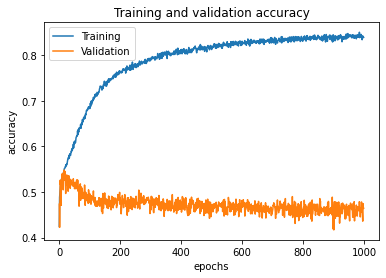

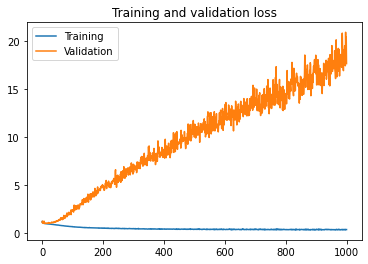

In [69]:
import matplotlib.pyplot as plt


acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.figure()


plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [70]:
model.predict(test_ds)

Consider rewriting this model with the Functional API.


array([[8.0251157e-01, 1.9573884e-01, 7.2357875e-13, 1.7495771e-03],
       [1.3007881e-10, 2.2386316e-06, 9.9999774e-01, 1.5740377e-10],
       [1.0000000e+00, 3.0961317e-08, 2.4607091e-27, 2.6623243e-13],
       ...,
       [9.9976951e-01, 3.9877381e-05, 9.6664502e-05, 9.3900839e-05],
       [3.7144897e-12, 8.1389606e-02, 9.1861039e-01, 1.8281127e-11],
       [1.5008771e-16, 1.0573472e-05, 1.3516941e-02, 9.8647249e-01]],
      dtype=float32)

In [71]:
a = model.predict(test_ds)

In [72]:
a.shape

(2627, 4)

In [73]:
b = np.argmax(a, axis=1)

In [74]:
b

array([0, 2, 0, ..., 0, 2, 3])

In [75]:
dff = pd.Series(b)

In [76]:
dffff = pd.Series(b)

In [77]:
df4 = dff.rename('Segmentation')

In [78]:
dffff

0       0
1       2
2       0
3       2
4       3
       ..
2622    3
2623    0
2624    0
2625    2
2626    3
Length: 2627, dtype: int64

In [79]:
df4.replace(to_replace = 0, value = 'A', inplace=True)
df4.replace(to_replace = 1, value = 'B', inplace=True) 
df4.replace(to_replace = 2, value = 'C', inplace=True) 
df4.replace(to_replace = 3, value = 'D', inplace=True) 

In [80]:
df4

0       A
1       C
2       A
3       C
4       D
       ..
2622    D
2623    A
2624    A
2625    C
2626    D
Name: Segmentation, Length: 2627, dtype: object

In [81]:
dftt = pd.read_csv('test.csv')
dfft = dftt['ID']

In [82]:
dfft

0       458989
1       458994
2       458996
3       459000
4       459001
         ...  
2622    467954
2623    467958
2624    467960
2625    467961
2626    467968
Name: ID, Length: 2627, dtype: int64

In [83]:
df3 = pd.concat([dfft, df4], axis=1)

In [84]:
#df3.set_index('ID', inplace=True)

In [85]:
df3

,ID,Segmentation
0,458989,A
1,458994,C
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,C


In [86]:
fr = open("AV_CS6.csv", "w")
df3.to_csv(r'AV_CS6.csv', index = False)
fr.close()